In [1]:
from matplotlib import pyplot as plt
import pandas as pd

In [6]:
# fix Q2.2 log file
exp2_file = "runs/Puppersim-v0__puppersim__Q2.2__1__1712987812/log_data.csv"

needed_stats = []
with open(exp2_file, 'r', encoding='utf-8') as f:
    for l in f:
        l = l.strip()
        if len(l.split(',')) < 6:
            continue
        needed_stats.append(l)

# needed_stats = pd.read_csv(pd.compat.StringIO('\n'.join(needed_stats)))
header_line = ','.join(['train_returns_Average', 'train_returns_Std', 'train_returns_Median', 'train_returns_Min', 'train_returns_Max', 'train_ep_lens_Average', 'train_ep_lens_Std', 'train_ep_lens_Median', 'train_ep_lens_Min', 'train_ep_lens_Max', 'TimeSinceStart', 'VectorizedStep', 'GlobalStep', 'SingleStep'])
needed_stats = [header_line] + needed_stats

# write to new file
with open("runs/Puppersim-v0__puppersim__Q2.2__1__1712987812/filt_log_data.csv", 'w', encoding='utf-8') as f:
    f.write('\n'.join(needed_stats))
    

## Q2.3

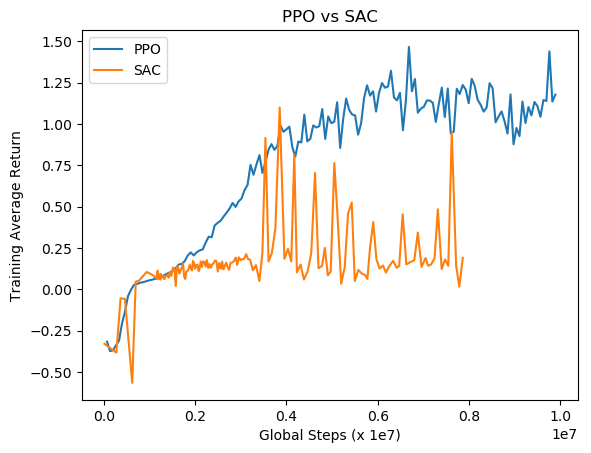

In [31]:
exp1_file = "runs/Puppersim-v0__puppersim__Q2.1__1__1712962761/log_data.csv"
exp2_file = "runs/Puppersim-v0__puppersim__Q2.2__1__1712987812/filt_log_data.csv"

# read the file
exp1_data = pd.read_csv(exp1_file)
exp2_data = pd.read_csv(exp2_file)

# data
exp1_y = exp1_data["train_returns_Average"]
exp1_x = exp1_data["GlobalStep"]
exp2_y = exp2_data["train_returns_Average"]
exp2_x = exp2_data["GlobalStep"]

exp2_x_strided = [exp2_x[i] for i in range(0, len(exp2_x), 248)]
exp2_y_strided = [exp2_y[i] for i in range(0, len(exp2_y), 248)]

# plot

plt.plot(list(exp1_x), list(exp1_y), label="PPO")
plt.plot(list(exp2_x_strided), list(exp2_y_strided), label="SAC")

plt.xlabel("Global Steps (x 1e7)")
plt.ylabel("Training Average Return")
plt.title("PPO vs SAC")
plt.legend()
plt.show()


## Q3: history length

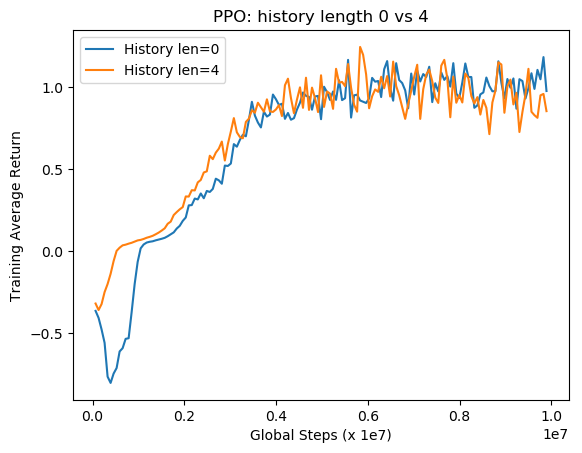

In [32]:
exp_h0_file = "runs/Puppersim-v0__puppersim__Q3h0__1__1713034367/log_data.csv"
exp_h4_file = "runs/Puppersim-v0__puppersim__Q3h4__1__1713034432/log_data.csv"

exp_h0_data = pd.read_csv(exp_h0_file)
exp_h4_data = pd.read_csv(exp_h4_file)

# data
exp_h0_y = exp_h0_data["train_returns_Average"]
exp_h0_x = exp_h0_data["GlobalStep"]
exp_h4_y = exp_h4_data["train_returns_Average"]
exp_h4_x = exp_h4_data["GlobalStep"]

# plot

plt.plot(list(exp_h0_x), list(exp_h0_y), label="History len=0")
plt.plot(list(exp_h4_x), list(exp_h4_y), label="History len=4")

plt.xlabel("Global Steps (x 1e7)")
plt.ylabel("Training Average Return")
plt.title("PPO: history length 0 vs 4")
plt.legend()
plt.show()



## Q3: Gaussian noise

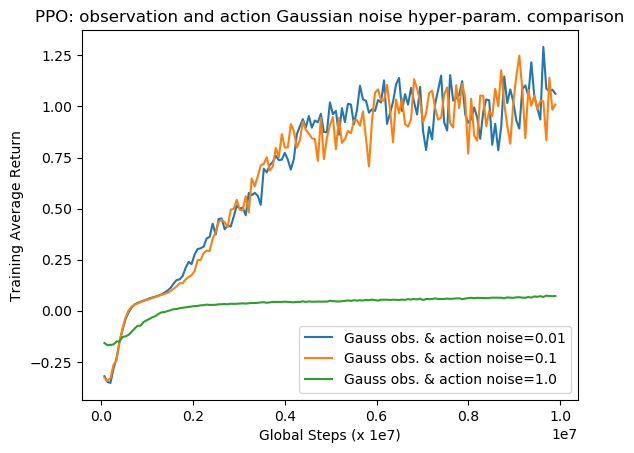

In [33]:
exp1_file = "runs/Puppersim-v0__puppersim__Q3g0.0__1__1713046294/log_data.csv"
exp2_file = "runs/Puppersim-v0__puppersim__Q3g0.1__1__1713046294/log_data.csv"
exp3_file = "runs/Puppersim-v0__puppersim__Q3g1__1__1713046294/log_data.csv"

# read the file
exp1_data = pd.read_csv(exp1_file)
exp2_data = pd.read_csv(exp2_file)
exp3_data = pd.read_csv(exp3_file)

# data
exp1_y = exp1_data["train_returns_Average"]
exp1_x = exp1_data["GlobalStep"]
exp2_y = exp2_data["train_returns_Average"]
exp2_x = exp2_data["GlobalStep"]
exp3_y = exp3_data["train_returns_Average"]
exp3_x = exp3_data["GlobalStep"]

# plot

plt.plot(list(exp1_x), list(exp1_y), label="Gauss obs. & action noise=0.01")
plt.plot(list(exp2_x), list(exp2_y), label="Gauss obs. & action noise=0.1")
plt.plot(list(exp3_x), list(exp3_y), label="Gauss obs. & action noise=1.0")


plt.xlabel("Global Steps (x 1e7)")
plt.ylabel("Training Average Return")
plt.title("PPO: observation and action Gaussian noise hyper-param. comparison")
plt.legend()
plt.show()
